In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

(2950, 1)

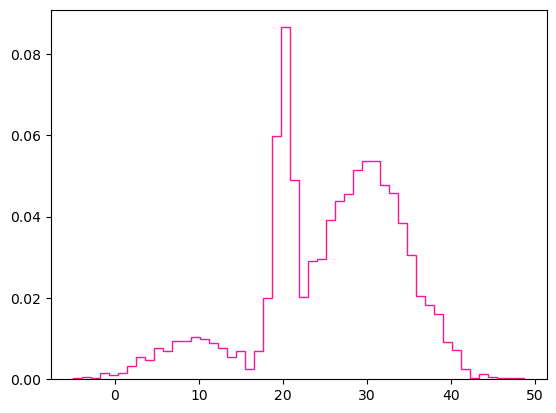

In [2]:
data = np.load('formationchannels.npy')

plt.figure(dpi = 100)
plt.hist(data, bins=50, density=True, histtype='step', color='deeppink', linewidth=1)
data.shape

I recognize here 3 modes by eye, let's see

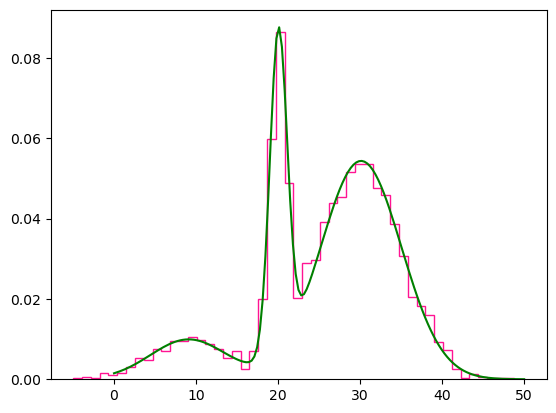

In [3]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)

x = np.linspace(0, 50, 150)[:, np.newaxis]

logprob = gm.score_samples(x)
plt.hist(data, bins=50, density=True, histtype='step', color='deeppink', linewidth=1)
plt.plot(x, np.exp(logprob), label='fit plot', color="green") #exponential because of log
plt.show()

It seems to fit well with a 3 components gaussian mixture. Now I test if it is the one with the lowest AIC score:

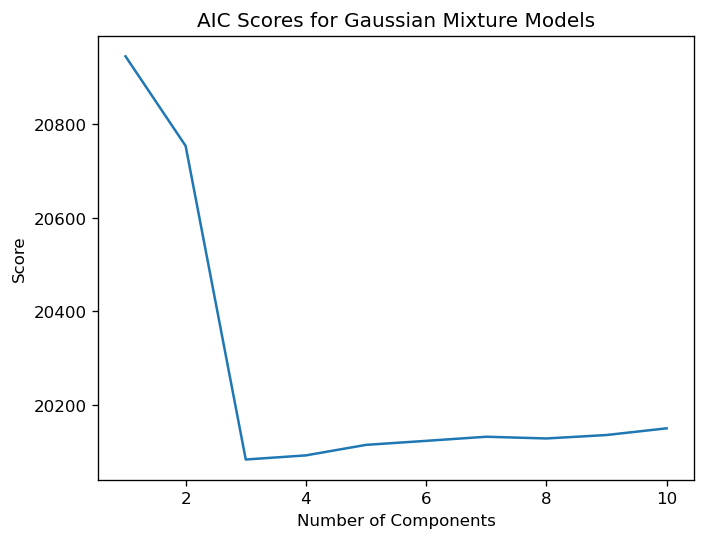

In [4]:
components_range = range(1, 11)

gm_models = []
for n_components in components_range:
    gm = GaussianMixture(n_components=n_components, random_state=0)
    gm.fit(data)
    gm_models.append(gm)

plt.figure(dpi = 120)    
plt.plot(components_range, [model.aic(data) for model in gm_models], label='AIC') #The model with lowest AIC is the most favored.

plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC Scores for Gaussian Mixture Models')
plt.show()

In [5]:
M_best = gm_models[np.argmin([model.aic(data) for model in gm_models])]
M_best

GaussianMixture(n_components=3, random_state=0)

What about responsabilities? What are the individual components?

In [6]:
x = np.linspace(0, 50, 150)
responsiblity = M_best.predict_proba(x.reshape(-1, 1))
means = M_best.means_
covariances = M_best.covariances_
logprob = M_best.score_samples(x.reshape(-1, 1))
pdf = np.exp(logprob)

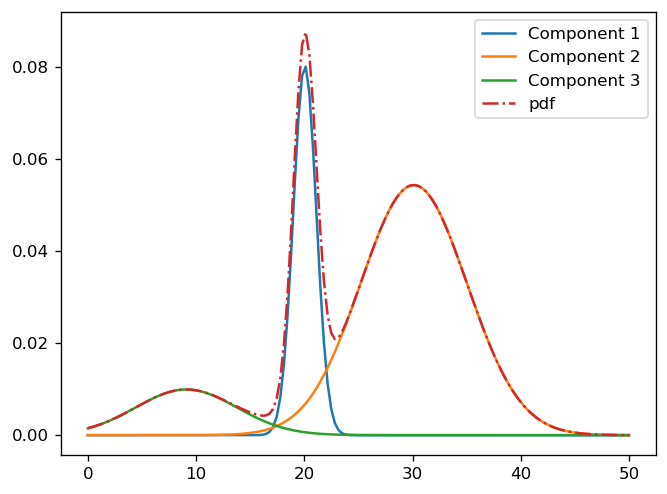

In [7]:
plt.figure(dpi = 120)
for i in range(responsiblity.shape[1]):
    mean = means[i][0]  
    std_dev = np.sqrt(covariances[i][0])  

    # Calculate PDF for each Gaussian component
    pdf_values =responsiblity[:,i] * pdf

    plt.plot(x, pdf_values, label=f'Component {i+1}')

plt.plot(x, pdf, ls='dashdot', label='pdf', lw=1.5)
#plt.hist(data, bins=100, density=True, histtype='step', color='deeppink', linewidth=1, label='data')
plt.legend()
plt.show()    